In [ ]:
''''# it used for regression problem 
#output in the for of yes or is 
setps : -
1 import librarryes
2 import dataclasses
3 analuysies datda
4 split data
5 train model
6 chek model outcome

'''


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib as plt


In [2]:
df = pd.read_csv('G:/Projects/Folder for csv file/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
df.shape

(1025, 14)

In [13]:
x = df.drop(columns=['target'])
y = df['target']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.2,random_state=0)

In [17]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [19]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3
696,50,0,2,120,219,0,1,158,0,1.6,1,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
461,48,1,2,124,255,1,1,175,0,0.0,2,2,2
598,58,1,1,120,284,0,0,160,0,1.8,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2


In [20]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
807,44,1,2,130,233,0,1,179,1,0.4,2,0,2
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2
77,63,1,0,140,187,0,0,144,1,4.0,2,2,3
406,58,1,2,140,211,1,0,165,0,0.0,2,0,2
886,61,1,0,120,260,0,1,140,1,3.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3
25,61,0,0,145,307,0,0,146,1,1.0,1,0,3
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2


In [21]:
y_train

528    1
696    1
621    0
461    1
598    0
      ..
835    0
192    1
629    0
559    0
684    0
Name: target, Length: 205, dtype: int64

In [22]:
y_test

807    1
27     0
77     0
406    1
886    0
      ..
464    1
25     0
110    0
149    1
152    0
Name: target, Length: 820, dtype: int64

In [23]:
lr = LogisticRegression()

In [35]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C' : [1,2,3,4,5,6,7,8,9,9,12,25,30,47,55], 'max_iter' : [100,200,500,700,]}

In [36]:
classifier_regression = GridSearchCV(lr,param_grid= parameter,scoring='accuracy',cv = 5)

In [37]:
classifier_regression.fit(x_train,y_train)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 12, 25, 30, 47,
                               55],
                         'max_iter': [100, 200, 500, 700],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [38]:
print(classifier_regression.best_params_)

{'C': 55, 'max_iter': 200, 'penalty': 'l2'}


In [39]:
print(classifier_regression.best_score_)

0.8146341463414635


In [42]:
#prediction
y_pred = classifier_regression.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1
 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0
 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 1 0 0 1 0 1 0 

In [43]:
##accuracy score
from sklearn.metrics import accuracy_score, classification_report


In [44]:
score = accuracy_score(y_pred,y_test)
print(score)

0.8341463414634146


In [46]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       408
           1       0.82      0.85      0.84       412

    accuracy                           0.83       820
   macro avg       0.83      0.83      0.83       820
weighted avg       0.83      0.83      0.83       820



c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

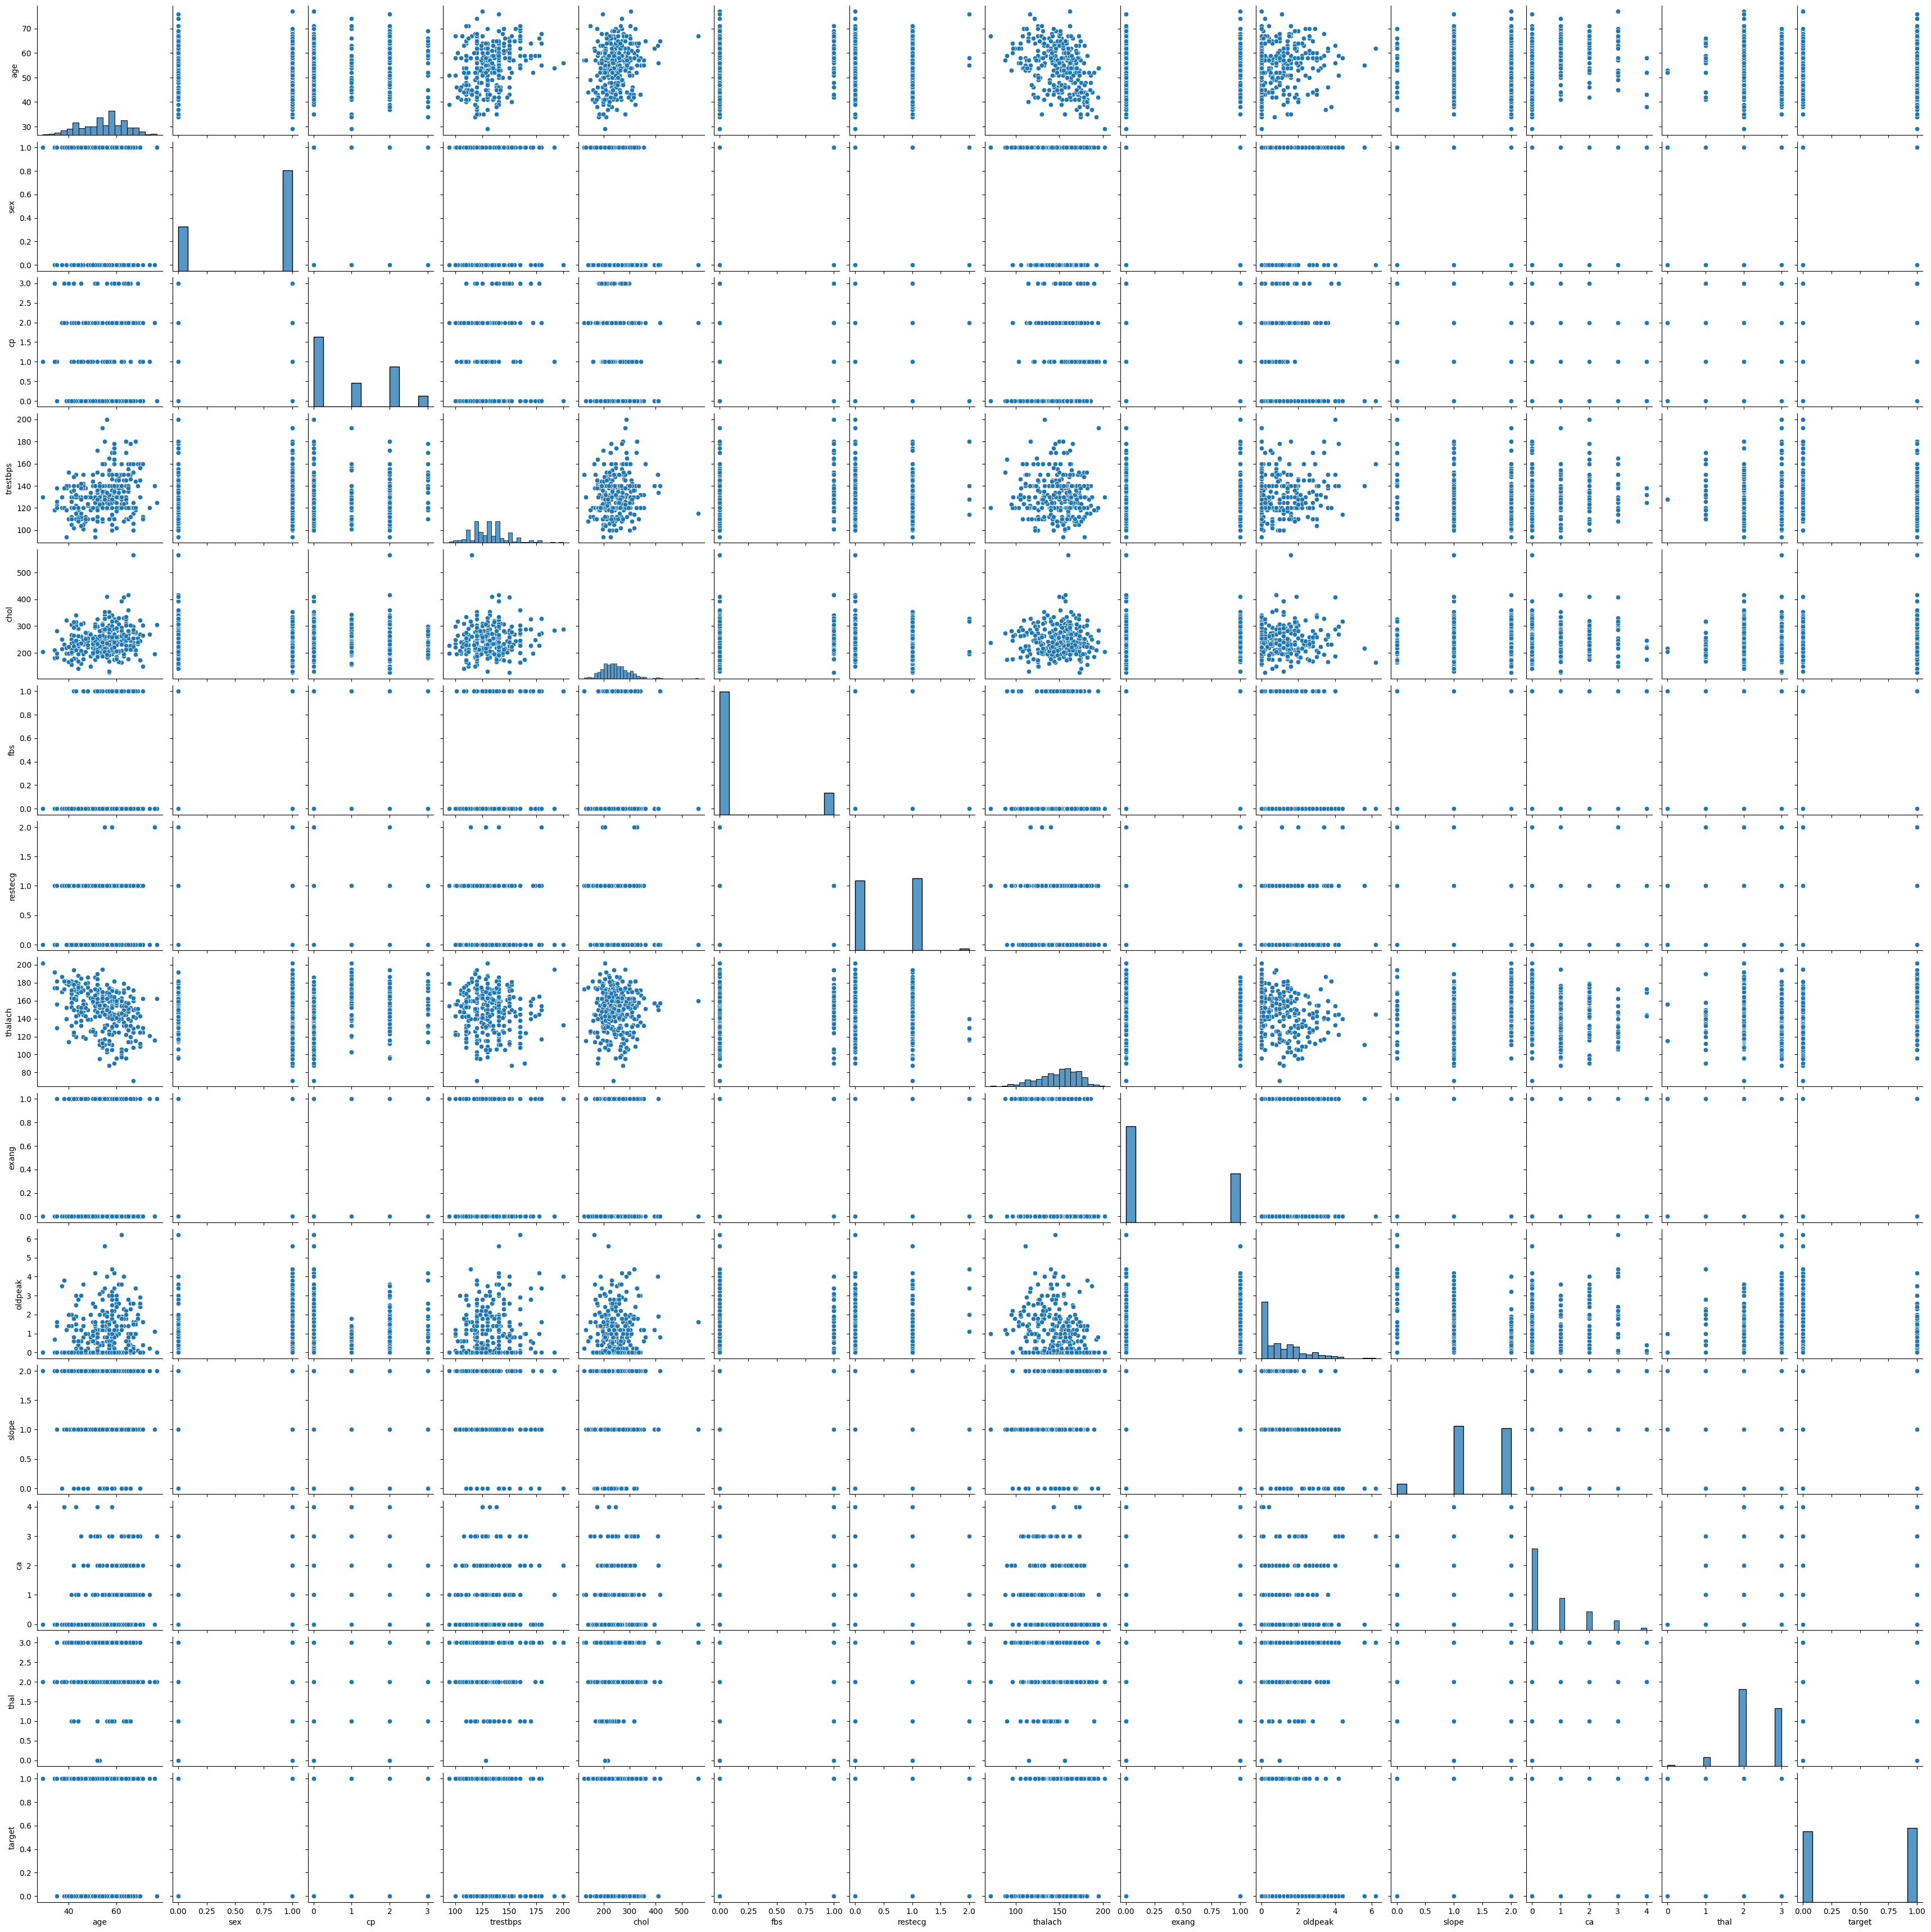

In [50]:
#EDA
import seaborn as sns
sns.pairplot(df)

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

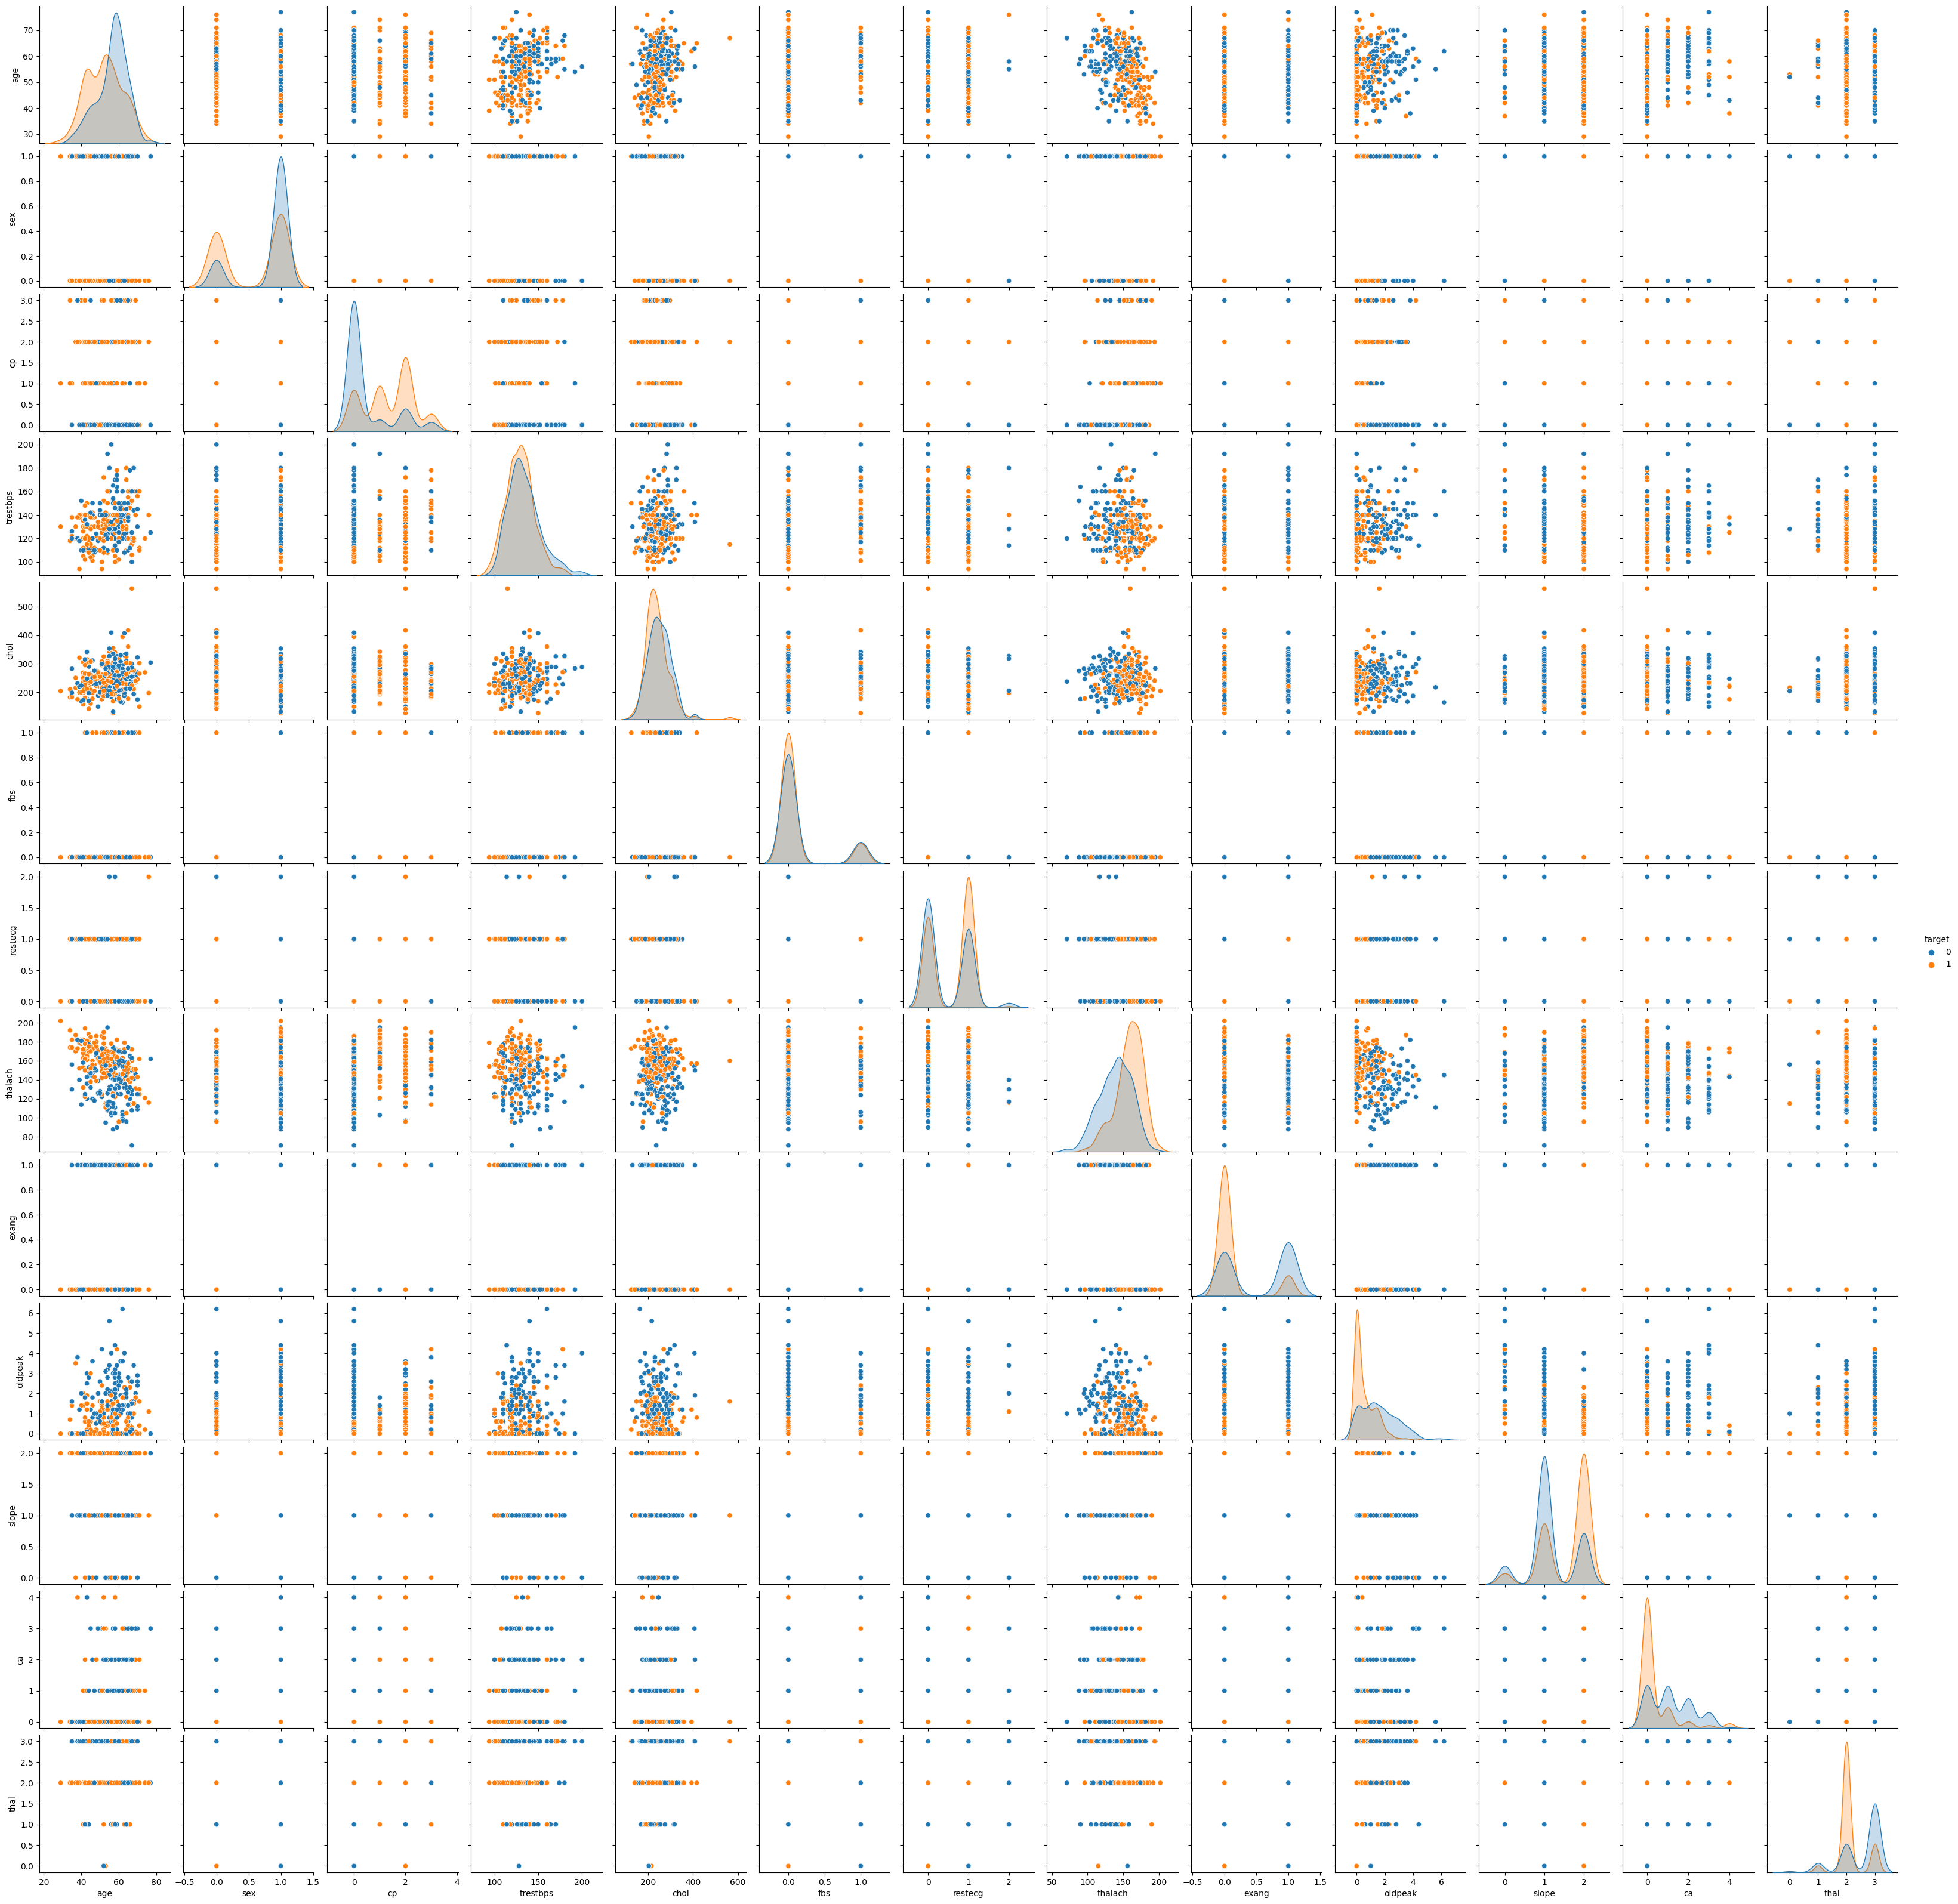

In [48]:
sns.pairplot(df,hue= 'target')

In [49]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [60]:
input_data = [70,1,0,145,174,0,1,125,1,2.6,0,0,3]
inputdataasarry = np.array(input_data)
input_data_reshaped = inputdataasarry.reshape(1,-1)
predicition = classifier_regression.predict(input_data_reshaped)
print(predicition)


[0]


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
if (predicition[0] == 0 ):
    print ("The person does not have heart disease.")
else:
    print("The person has heart disaese")

The person does not have heart disease.
